# Project: No Show Appoinment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this report we will discover No Show Appoinment Dataset. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 
>Questions to investigate:
1. How age distribution related to no show?
2. How gender associated with no show?
3. How scholarship, hipertension,diabetes, alcoholism, handcap, sms_received
4. Does waiting time affect no show?
5. Where is the most visited neighborhood?

In [1]:
# import all necessary packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Check dimension of data 
df.shape

(110527, 14)

In [4]:
#Checking datatypes of columns
df.dtypes
# PatientID, AppointmentID  seem to be useless, scheduledDay and AppointmentDay should be in Datetime datatypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#Checking if data contains Null, expecting False 
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [6]:
# Checking if dataset contains duplicates
df.duplicated().sum()

0

### Data Cleaning 

**Data cleaning step summary** 
1. Inspect dimension of data, data types,null values, duplicates
2. Drop unnecessary columns
3. Rename columns 
4. Change datatype
5. Drop rows which contains false information
6. Correct values in handicap column  

In [7]:
# drop patientID
df.drop(["PatientId", "AppointmentID"], axis = 1, inplace = True)

First I droped patientID and AppointmentID which contains information I dont need for my analysis

In [8]:
#Rename columns to all small case to easy for using later
df.rename(columns =(lambda x: x.lower()), inplace = True)
df.rename(columns ={"scheduledday" : "scheduled_day"}, inplace =True)
df.rename(columns ={"appointmentday" : "appointment_day"}, inplace =True)
df.rename(columns = {"no-show":"no_show"}, inplace = True)

The act of changing to lower charcter and renaming columns makes it easy to call columns' name

In [9]:
# Changing datatypes
time_columns =["scheduled_day", "appointment_day"]
for i in time_columns:
    df[i] = pd.to_datetime(df[i])

In [10]:
#appointment_day data differs from scheduled_day, so I changed it all to date to calculate date different
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date

In [11]:
#Discover some appointment date happended before scheduled and I decided to drop these
df.drop(df.query("scheduled_day > appointment_day").index, inplace = True)

I decided to compute waiting time, so I need to change datatype for "scheduled_day", "appointment_day", and drop those scheduled_day > appointment_day, which is weird and can cause false decision

In [12]:
#Checking column age and see minus age, which need to remove
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [13]:
df.query(" age == -1")

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
df.drop(df.query(" age == -1").index, inplace = True)

Age column appear to have negative value which I drop to prevent it from affecting the result

In [15]:
#This is my independent variable and I want to count it later so I replace it from Yes, No to 0, 1
df.no_show = df.no_show.replace(["Yes","No"], [0,1])
df.no_show.unique()

array([1, 0])

In [16]:
#Checking handcap columns and correcting its values
df.handcap.unique()

array([0, 1, 2, 3, 4])

In [17]:
df.handcap = df.handcap.replace([2,3,4],1)
df.handcap.unique()

array([0, 1])

Handcap should be access by 1: If it is and 0 otherwise, so I corrrect it 

In [18]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis


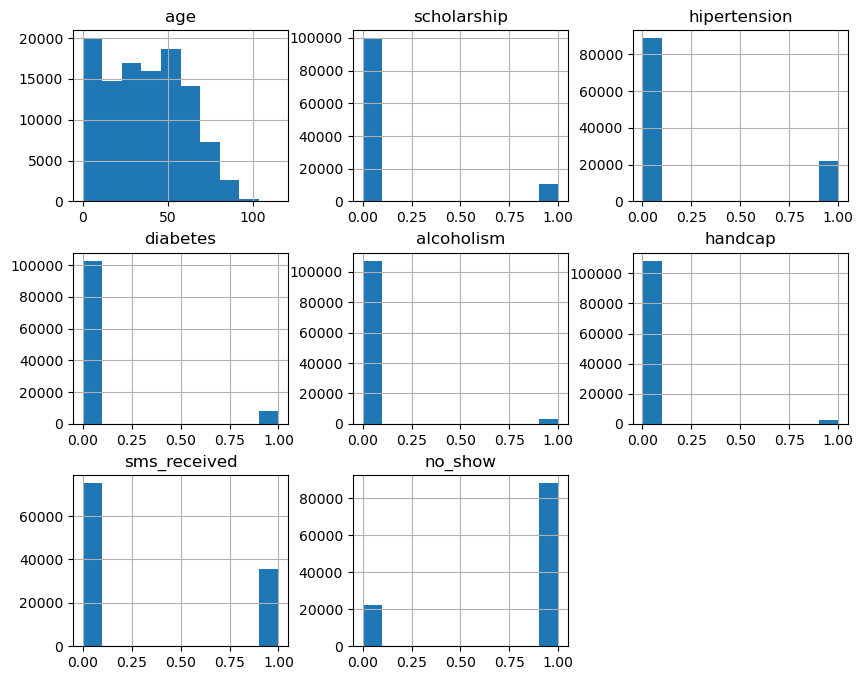

In [19]:
df.hist(figsize = (10,8));

### Question 1: How age distribution related to no show?

In [20]:
presence = df.no_show == True
absence = df.no_show == False

In [21]:
df.age[presence].mean()

37.790504154999034

In [22]:
df.age[absence].mean()

34.31787218786412

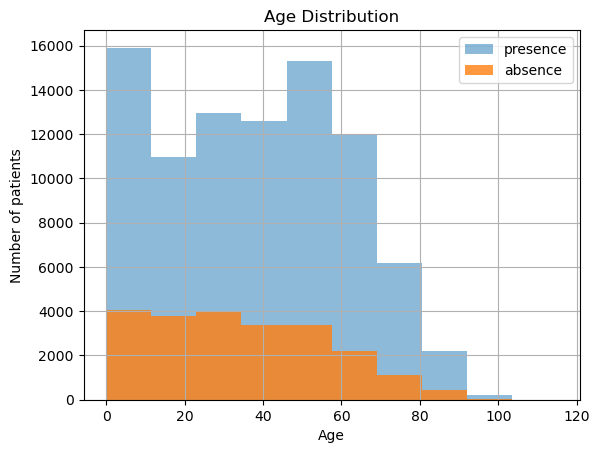

In [23]:
# Analysing age distribution between associated with no show
df.age[presence].hist(alpha = 0.5, label = 'presence')
df.age[absence].hist(alpha =0.8, label = "absence")
plt.title("Age Distribution")
plt.ylabel("Number of patients")
plt.xlabel("Age")
plt.legend();

>As we can see from the histogram, children and seniors( people above 50 years old) have higher posibility to attend on the appointment day than other ages

### Question 2: How gender assciated with no show?

<AxesSubplot:xlabel='gender'>

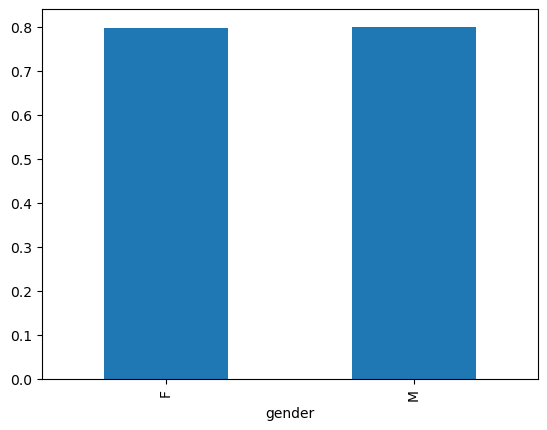

In [24]:
# Continue discover gender col
df.groupby('gender').no_show.mean().plot(kind ='bar')

In [25]:
# Count male and female in dataset
df.gender.value_counts()

F    71836
M    38685
Name: gender, dtype: int64

>There is no much difference in gender to predict if patient will attend or not. Although the dataset contains more women than men, the average number of men who book and no show seems nearly equal that number in women.

### Question 3: How scholarship, hipertension,diabetes, alcoholism, handcap, sms_received?

In [26]:
def plot(t, presence, absence):
    t[presence].value_counts().plot(kind = 'bar', alpha = 0.5, color = 'blue', label ='presence')
    t[absence].value_counts().plot(kind = 'bar', alpha = 0.5, color = 'brown', label ='absence')
    plt.legend()

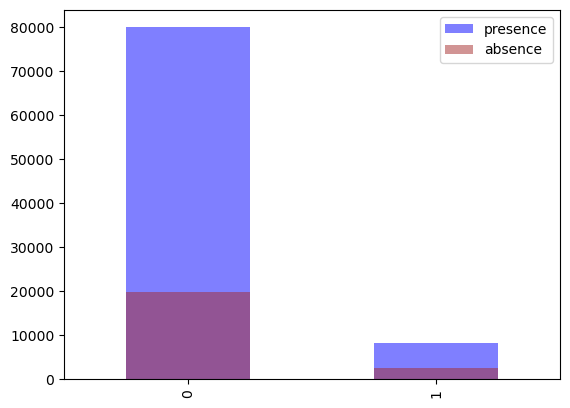

In [27]:
plot(df.scholarship, presence, absence)

> There is a large number of patients showing up in the appointment day whether they have scholarship

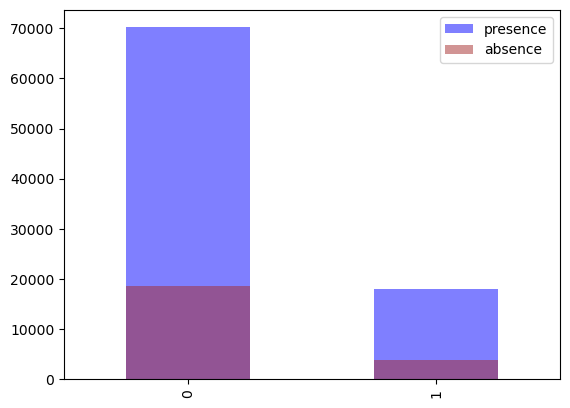

In [28]:
plot(df.hipertension, presence, absence)

>There is a large number of patients showing up in the appointment day whether they have hipertension, however it show that patients who have hipertension have higher posibility to attend.

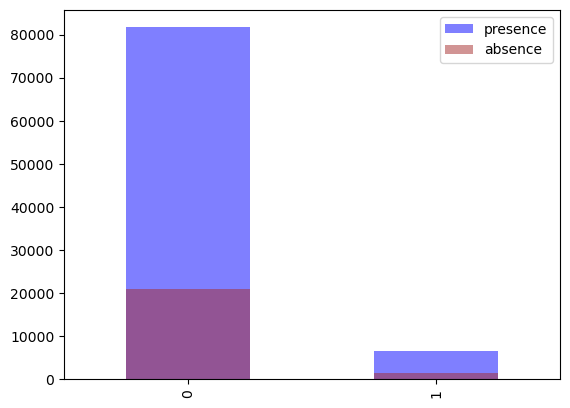

In [29]:
plot(df.diabetes,presence, absence)

>There is a large number of patients showing up in the appointment day whether they have hipertension, however it show that patients who have diabetes have higher posibility to attend.

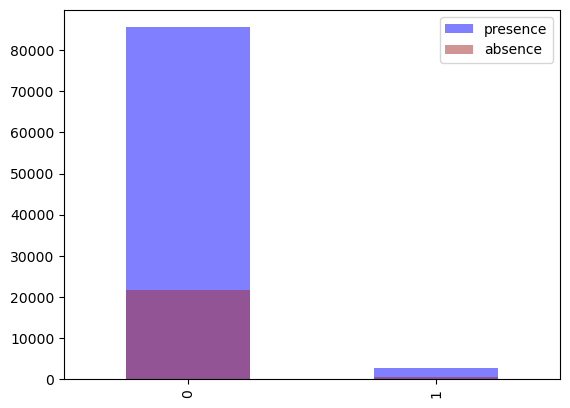

In [30]:
plot(df.alcoholism, presence,absence)

>There is a large number of patients showing up in the appointment day whether they have alcoholism or not.

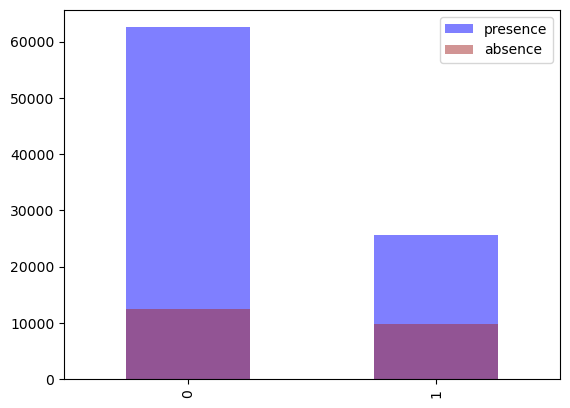

In [31]:
plot(df.sms_received, presence, absence)

>There is a large number of patients showing up in the appointment day whether they receive sms or not, however it show that patients who recieve sms clearly attend more.

### Question 4: Does waiting time affect no show ? 

In [32]:
# cout number of waitind days
df['waiting_days'] = df['appointment_day']- df['scheduled_day']
df.waiting_days

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Name: waiting_days, Length: 110521, dtype: timedelta64[ns]

In [33]:
#Finding the mean of date difference by no_show group
mean_waiting_days = df.groupby("no_show")["waiting_days"].mean()
mean_waiting_days

no_show
0   15 days 20:03:05.856413014
1    8 days 18:06:51.151042434
Name: waiting_days, dtype: timedelta64[ns]

Text(0, 0.5, 'Average days')

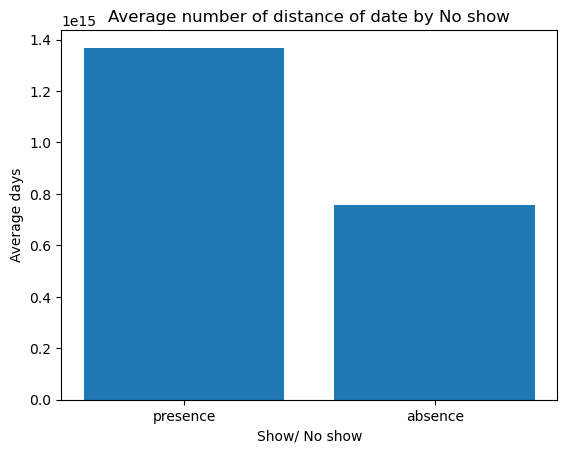

In [34]:
# Bar chart 
axis = [1,2]
height = mean_waiting_days
labels = ["presence","absence"]
plt.bar(axis,height, tick_label =labels)
plt.title("Average number of distance of date by No show")
plt.xlabel("Show/ No show")
plt.ylabel('Average days')

> Patients tend to attend if the waiting time is shorter or on avarge 8 days. 

### Question 5: Where patients visit the most?

In [35]:
# Most visit neibourhood
most_visited = df.neighbourhood[presence].value_counts()[0:3]

Text(0, 0.5, 'Amount of visitor')

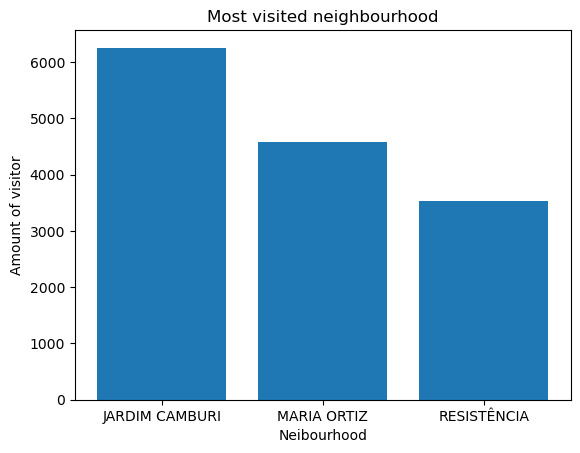

In [36]:
axis = [1, 2 ,3]
height = most_visited
plt.bar(axis, height, tick_label = most_visited.index)
plt.title("Most visited neighbourhood")
plt.xlabel("Neibourhood")
plt.ylabel("Amount of visitor")

>Jardim Camburi, Maria Ortiz, Resistencia are the top 3 neighbourhood that patients visit the most

<a id='conclusions'></a>
## Conclusions
1. There is higher posibility to attend if patients are children or seniors. In addition, patients suffers illness such as hipertension,diabetes, handcap seem to show up on appointment day. 
2. On average patients have longer waiting time (15 days as average) tend not to come on booking day. Patients has about within 8 days waiting are likely to show up. 

# Limitation
Datetime data is not conistent and some of appoinment days come before the scheduled days.Age data contains negative value. 
The results could be improved more with further research